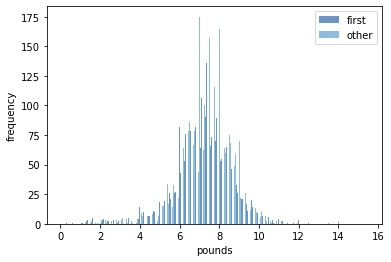

mean difference in weight -0.13
variance difference in weight 0.08
standard deviation difference in weight 0.03
Cohen's difference between two groups of total weight: -0.089
Cohen's difference between two groups of pregnancy length: 0.029


<Figure size 576x432 with 0 Axes>

In [17]:
import thinkstats2
import thinkplot
import nsfg
import math

def CohenEffectSize(group1, group2):
    """Function to calculate cohen's d to quantify the difference between the groups."""
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

# Getting the pregnancy data to preg dataframe.
preg = nsfg.ReadFemPreg()

# Getting the Live birth's dataframe from preg dataframe.
live = preg[preg.outcome == 1]

# dividing to two dataframes of first and other births.
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Creating two histograms of first and other births by total weight in lb's.
first_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='first')
other_hist = thinkstats2.Hist(others.totalwgt_lb, label='other')

# Plotting two histograms side by side to compare.
width = 0.02
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

# Calculating mean and variance by weight.
mean1 = round(firsts.totalwgt_lb.mean(),2)
mean2 = round(others.totalwgt_lb.mean(),2)
var1 = round(firsts.totalwgt_lb.var(),2)
var2 = round(others.totalwgt_lb.var(),2)
std1 = round(firsts.totalwgt_lb.std(),2)
std2 = round(others.totalwgt_lb.std(),2)

print('mean difference in weight', round(mean1-mean2,2))
print('variance difference in weight', round(var1-var2,2))
print('standard deviation difference in weight', round(std1-std2,2))

# Calculating and printing cohen's d by weight.
cohen_diff = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
print("Cohen's difference between two groups of total weight:", round(cohen_diff,3))

# Calculating and printing cohen's d by pregnancy length.
cohen_diff1 = CohenEffectSize(firsts.prglngth, others.prglngth)
print("Cohen's difference between two groups of pregnancy length:", round(cohen_diff1,3))
